In [12]:
pip install python-Levenshtein


Patt--- defaultdict(<class 'int'>, {(4, 2, 6, 8): 1, (2, 6, 8, 3): 1, (6, 8, 3, 7): 1, (8, 3, 7, 10): 1, (3, 7, 10, 2): 1, (7, 10, 2, 1): 1, (10, 2, 1, 5): 1, (2, 1, 5, 3): 1, (1, 5, 3, 7): 1, (5, 3, 7, 9): 1, (3, 7, 9, 5): 1, (7, 9, 5, 3): 1, (9, 5, 3, 6): 1, (5, 3, 6, 3): 1, (3, 6, 3, 5): 1, (6, 3, 5, 8): 1, (3, 5, 8, 4): 1, (7, 4, 10, 2): 2, (4, 10, 2, 1): 1, (10, 2, 1, 7): 1, (2, 1, 7, 6): 1, (1, 7, 6, 5): 1, (7, 6, 5, 2): 1, (6, 5, 2, 3): 1, (5, 2, 3, 4): 1, (2, 3, 4, 8): 1, (3, 4, 8, 1): 1, (4, 8, 1, 7): 1, (8, 1, 7, 3): 1, (1, 7, 3, 5): 1, (7, 3, 5, 3): 1, (3, 5, 3, 8): 1, (5, 3, 8, 5): 1, (3, 8, 5, 8): 1, (6, 2, 3, 4): 1, (2, 3, 4, 1): 1, (3, 4, 1, 10): 1, (4, 1, 10, 3): 1, (1, 10, 3, 8): 1, (10, 3, 8, 5): 1, (3, 8, 5, 4): 1, (8, 5, 4, 1): 1, (5, 4, 1, 10): 1, (4, 1, 10, 2): 1, (1, 10, 2, 9): 1, (10, 2, 9, 3): 1, (2, 9, 3, 6): 1, (9, 3, 6, 4): 2, (3, 6, 4, 7): 1, (6, 4, 7, 8): 1, (4, 7, 8, 2): 1, (4, 9, 2, 7): 1, (9, 2, 7, 1): 1, (2, 7, 1, 10): 1, (7, 1, 10, 7): 1, (1, 10, 7, 5

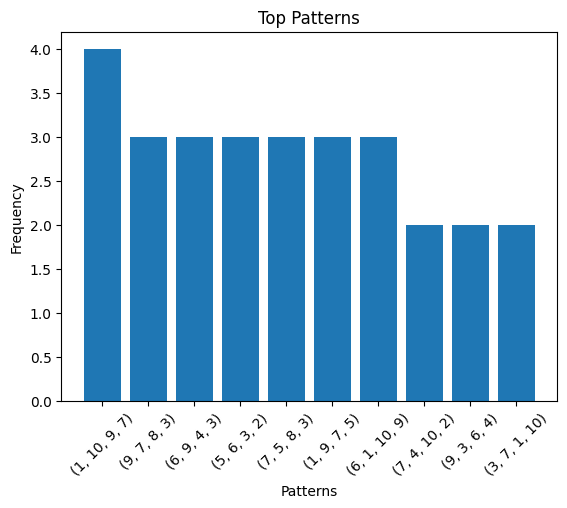

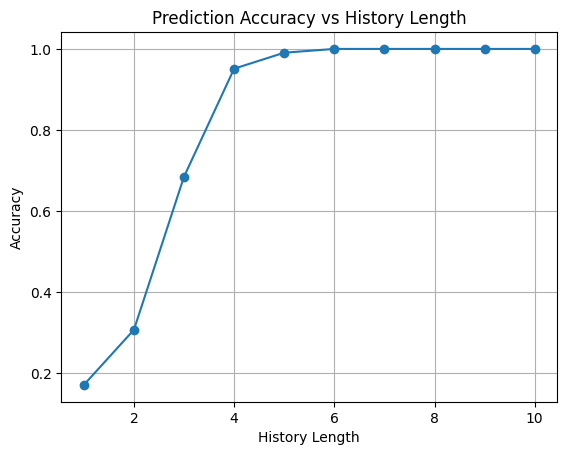

In [13]:
import pandas as pd
import numpy as np
from Levenshtein import distance as levenshtein_distance
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Load and preprocess the data
data = pd.read_csv('survey.csv')
sequences = data.iloc[:, 1:].values  # Assuming the first column is a timestamp

# Step 2: Damerau-Levenshtein Distance Function
def damerau_levenshtein(seq1, seq2):
    """
    Calculate the Damerau-Levenshtein distance between two sequences.
    """
    return levenshtein_distance(seq1, seq2)

# Step 3: Identify Patterns
def identify_patterns(sequences, pattern_length=4):
    patterns = defaultdict(int)
    for sequence in sequences:
        for i in range(len(sequence) - pattern_length + 1):
            pattern = tuple(sequence[i:i + pattern_length])
            patterns[pattern] += 1
    return patterns

# Find predominant patterns
patterns = identify_patterns(sequences)
print("Patt---",patterns)
predominant_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)[:10]
print("Top Patterns:", predominant_patterns)

# Step 4: Prediction using Markov Chain
def train_markov_chain(sequences, history_length=4):
    transition_matrix = defaultdict(lambda: defaultdict(int))
    for sequence in sequences:
        for i in range(len(sequence) - history_length):
            history = tuple(sequence[i:i + history_length])
            next_item = sequence[i + history_length]
            transition_matrix[history][next_item] += 1
    return transition_matrix

def predict_next(transition_matrix, history):
    if history in transition_matrix:
        return max(transition_matrix[history], key=transition_matrix[history].get)
    return np.random.choice(range(1, 11))  # Random prediction

# Train the Markov chain
markov_chain = train_markov_chain(sequences)

# Step 5: Evaluate Predictions
def evaluate_predictions(sequences, markov_chain, history_length=4):
    correct = 0
    total = 0
    for sequence in sequences:
        for i in range(len(sequence) - history_length):
            history = tuple(sequence[i:i + history_length])
            true_next = sequence[i + history_length]
            predicted_next = predict_next(markov_chain, history)
            if predicted_next == true_next:
                correct += 1
            total += 1
    accuracy = correct / total
    return accuracy

accuracy = evaluate_predictions(sequences, markov_chain)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")

# Step 6: Visualizations
# Plot pattern frequency
pattern_labels, pattern_counts = zip(*predominant_patterns)
plt.bar(range(len(pattern_labels)), pattern_counts)
plt.xticks(range(len(pattern_labels)), [str(label) for label in pattern_labels], rotation=45)
plt.title("Top Patterns")
plt.ylabel("Frequency")
plt.xlabel("Patterns")
plt.show()

# Plot prediction accuracy over history lengths
accuracies = []
for h in range(1, 11):
    markov_chain = train_markov_chain(sequences, history_length=h)
    acc = evaluate_predictions(sequences, markov_chain, history_length=h)
    accuracies.append(acc)

plt.plot(range(1, 11), accuracies, marker='o')
plt.title("Prediction Accuracy vs History Length")
plt.xlabel("History Length")
plt.ylabel("Accuracy")
plt.grid()
plt.show()


Prediction Accuracy: 95.12%


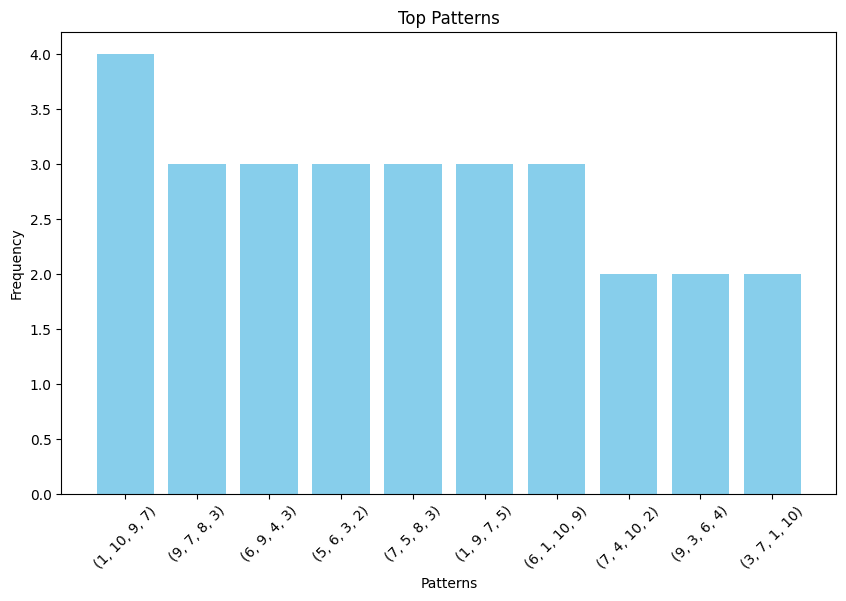

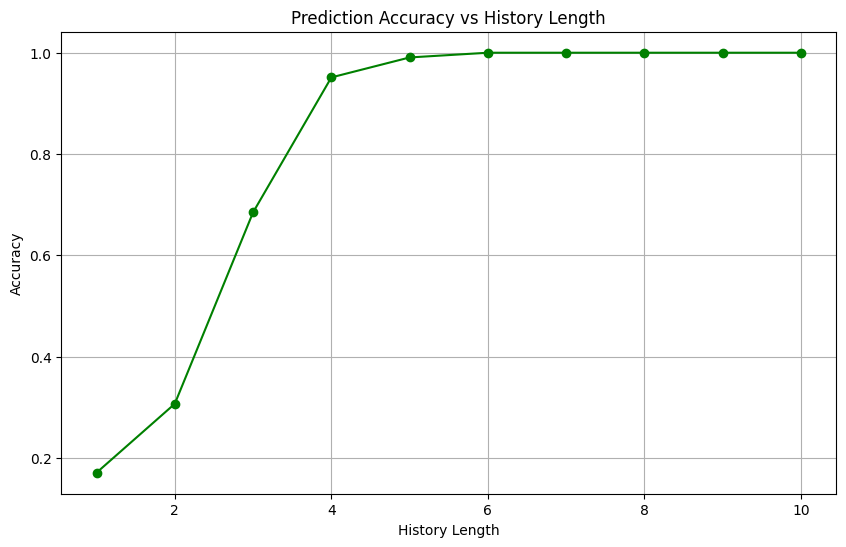

In [14]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
data = pd.read_csv('survey.csv')
sequences = data.iloc[:, 1:].values  # Assuming the first column is a timestamp

# Step 2: Identify Patterns
def identify_patterns(sequences, pattern_length=4):
    patterns = defaultdict(int)
    for sequence in sequences:
        for i in range(len(sequence) - pattern_length + 1):
            pattern = tuple(sequence[i:i + pattern_length])
            patterns[pattern] += 1
    return patterns

# Step 3: Train Markov Chain
def train_markov_chain(sequences, history_length=4):
    transition_matrix = defaultdict(lambda: defaultdict(int))
    for sequence in sequences:
        for i in range(len(sequence) - history_length):
            history = tuple(sequence[i:i + history_length])
            next_item = sequence[i + history_length]
            transition_matrix[history][next_item] += 1
    return transition_matrix

def predict_next(transition_matrix, history):
    if history in transition_matrix:
        return max(transition_matrix[history], key=transition_matrix[history].get)
    return np.random.choice(range(1, 11))  # Random prediction if no match found

# Step 4: Predict the next sequence for each row
def predict_sequences(sequences, history_length=4):
    markov_chain = train_markov_chain(sequences, history_length)
    predictions = []
    for sequence in sequences:
        predicted_row = []
        for i in range(len(sequence) - history_length):
            history = tuple(sequence[i:i + history_length])
            predicted_next = predict_next(markov_chain, history)
            predicted_row.append(predicted_next)
        predictions.append(predicted_row)
    return predictions

# Step 5: Evaluate Predictions
def evaluate_predictions(sequences, predictions, history_length=4):
    correct = 0
    total = 0
    for sequence, predicted_row in zip(sequences, predictions):
        for i in range(len(sequence) - history_length):
            true_next = sequence[i + history_length]
            predicted_next = predicted_row[i]
            if predicted_next == true_next:
                correct += 1
            total += 1
    accuracy = correct / total
    return accuracy

# Predict sequences
history_length = 4
predictions = predict_sequences(sequences, history_length)
accuracy = evaluate_predictions(sequences, predictions, history_length)
print(f"Prediction Accuracy: {accuracy * 100:.2f}%")

# Step 6: Visualizations
# Identify top patterns
patterns = identify_patterns(sequences, pattern_length=history_length)
top_patterns = sorted(patterns.items(), key=lambda x: x[1], reverse=True)[:10]

# Plot top patterns
pattern_labels, pattern_counts = zip(*top_patterns)
plt.figure(figsize=(10, 6))
plt.bar(range(len(pattern_labels)), pattern_counts, color='skyblue')
plt.xticks(range(len(pattern_labels)), [str(label) for label in pattern_labels], rotation=45)
plt.title("Top Patterns")
plt.ylabel("Frequency")
plt.xlabel("Patterns")
plt.show()

# Plot prediction accuracy over history lengths
accuracies = []
for h in range(1, 11):
    predictions_h = predict_sequences(sequences, history_length=h)
    acc = evaluate_predictions(sequences, predictions_h, history_length=h)
    accuracies.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o', color='green')
plt.title("Prediction Accuracy vs History Length")
plt.xlabel("History Length")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

# Plot identification rate
def calculate_identification_rate(sequences, history_length=4):
    markov_chain = train_markov_chain(sequences, history_length)
    identification_rates = []
    for sequence in sequences:
        other_sequences = [seq for seq in sequences if not np.array_equal(seq, sequence)]
        same_subject_correct = 0
        for seq in other_sequences:
            correct = evaluate_predictions([sequence], [predict_sequences([seq], history_length)[0]], history_length)
            if correct > 0:
                same_subject_correct += 1
        identification_rates.append(same_subject_correct / len(other_sequences))
    return identification_rates




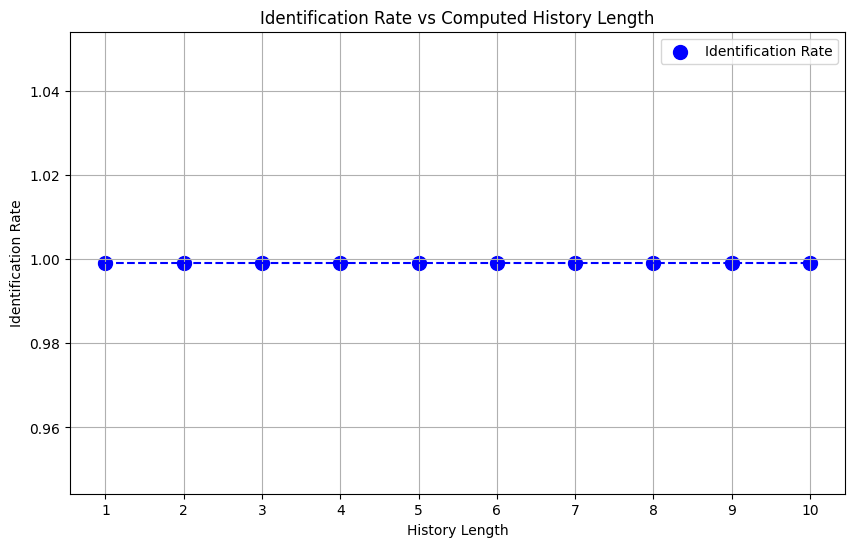

In [15]:
def calculate_identification_rate_vs_length(sequences, max_history_length=10):
    """
    Calculate identification rates for different history lengths.
    """
    identification_rates = []
    for history_length in range(1, max_history_length + 1):
        same_subject_correct = 0
        total_comparisons = 0
        for i, sequence in enumerate(sequences):
            for j, other_sequence in enumerate(sequences):
                if i == j:
                    continue  # Skip self-comparisons
                # Train Markov Chain for this history length
                markov_chain = train_markov_chain(sequences, history_length)

                # Predict accuracy for sequence[i] using its own Markov Chain
                own_accuracy = evaluate_predictions([sequence], predict_sequences([sequence], history_length), history_length)

                # Predict accuracy for sequence[i] using sequence[j]'s Markov Chain
                other_accuracy = evaluate_predictions([sequence], predict_sequences([other_sequence], history_length), history_length)

                # If self is more accurate, count as correct
                if own_accuracy > other_accuracy:
                    same_subject_correct += 1

                total_comparisons += 1

        # Calculate identification rate for this history length
        identification_rate = same_subject_correct / total_comparisons if total_comparisons > 0 else 0
        identification_rates.append(identification_rate)

    return identification_rates

# Calculate identification rates for history lengths 1 to 10
max_history_length = 10
identification_rates = calculate_identification_rate_vs_length(sequences, max_history_length)

# Plot Identification Rate vs History Length
plt.figure(figsize=(10, 6))
plt.scatter(range(1, max_history_length + 1), identification_rates, color='blue', s=100, marker='o', label='Identification Rate')
plt.plot(range(1, max_history_length + 1), identification_rates, color='blue', linestyle='--')
plt.title("Identification Rate vs Computed History Length")
plt.xlabel("History Length")
plt.ylabel("Identification Rate")
plt.xticks(range(1, max_history_length + 1))
plt.grid()
plt.legend()
plt.show()


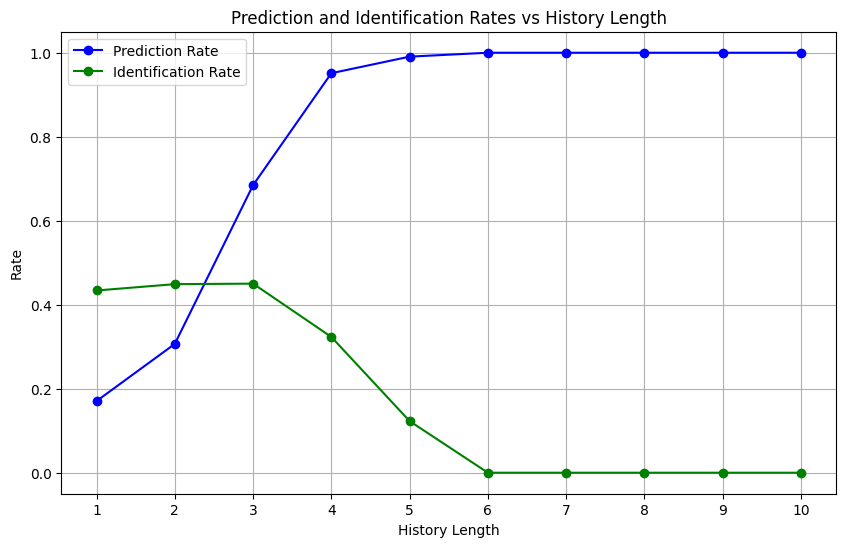

In [16]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

# Step 1: Load the dataset
data = pd.read_csv('survey.csv')
sequences = data.iloc[:, 1:].values  # Assuming the first column is a timestamp

# Step 2: Define functions for Markov Chain and metrics

# Train Markov Chain
def train_markov_chain(sequences, history_length=4):
    """
    Train a Markov Chain using the given sequences and history length.
    """
    transition_matrix = defaultdict(lambda: defaultdict(int))
    for sequence in sequences:
        for i in range(len(sequence) - history_length):
            history = tuple(sequence[i:i + history_length])
            next_item = sequence[i + history_length]
            transition_matrix[history][next_item] += 1
    return transition_matrix

# Predict the next value using the Markov Chain
def predict_next(transition_matrix, history):
    """
    Predict the next number based on the given history.
    """
    if history in transition_matrix:
        return max(transition_matrix[history], key=transition_matrix[history].get)
    return np.random.choice(range(1, 11))  # Random prediction if no match

# Evaluate Prediction Rate
def evaluate_predictions(sequences, markov_chain, history_length=4):
    """
    Evaluate the prediction accuracy of the Markov Chain model.
    """
    correct = 0
    total = 0
    for sequence in sequences:
        for i in range(len(sequence) - history_length):
            history = tuple(sequence[i:i + history_length])
            true_next = sequence[i + history_length]
            predicted_next = predict_next(markov_chain, history)
            if predicted_next == true_next:
                correct += 1
            total += 1
    return correct / total if total > 0 else 0

# Calculate Identification Rate
def calculate_identification_rate(sequences, history_length=4):
    """
    Calculate the identification rate for the dataset.
    """
    same_subject_correct = 0  # Count of correct identifications
    total_comparisons = 0     # Total number of comparisons

    for i, sequence in enumerate(sequences):
        for j, other_sequence in enumerate(sequences):
            if i == j:
                continue  # Skip self-comparisons

            # Train Markov Chain for the current history length
            markov_chain = train_markov_chain(sequences, history_length)

            # Predict accuracy for the current sequence using its own Markov Chain
            own_accuracy = evaluate_predictions([sequence], markov_chain, history_length)

            # Predict accuracy for the current sequence using the other sequence's Markov Chain
            other_accuracy = evaluate_predictions([other_sequence], markov_chain, history_length)

            # If self-accuracy is greater than the other accuracy, count as correct
            if own_accuracy > other_accuracy:
                same_subject_correct += 1

            total_comparisons += 1  # Increment total comparisons

    return same_subject_correct / total_comparisons if total_comparisons > 0 else 0

# Step 3: Calculate Rates for Different History Lengths
history_lengths = range(1, 11)
prediction_rates = []
identification_rates = []

for history_length in history_lengths:
    markov_chain = train_markov_chain(sequences, history_length)
    prediction_rate = evaluate_predictions(sequences, markov_chain, history_length)
    identification_rate = calculate_identification_rate(sequences, history_length)

    prediction_rates.append(prediction_rate)
    identification_rates.append(identification_rate)

# Step 4: Plot Results
plt.figure(figsize=(10, 6))

# Plot Prediction Rate
plt.plot(history_lengths, prediction_rates, marker='o', color='blue', label='Prediction Rate')

# Plot Identification Rate
plt.plot(history_lengths, identification_rates, marker='o', color='green', label='Identification Rate')

# Add labels, title, and legend
plt.title("Prediction and Identification Rates vs History Length")
plt.xlabel("History Length")
plt.ylabel("Rate")
plt.xticks(history_lengths)
plt.grid()
plt.legend()

# Show the plot
plt.show()
